# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | **Encode a categorical variable as binary indicator columns with exactly one “1” per row and the rest “0”.** |
| **Feature selection*** | **Choose a subset of features that best predict the target to reduce variance and improve interpretability. Methods include filter, wrapper, and embedded.** |
| **Classifier** | **A model that maps features to discrete class labels, often also producing class probabilities.** |
| **Precision** | **Fraction of predicted positives that are true positives.** |
| **Recall** | **Fraction of actual positives that are correctly identified.** |
| **F1 Score** | **Harmonic mean of precision and recall.** |
| **Parsimonious model** | **The simplest model that achieves adequate predictive performance, using minimal parameters or features.** |
| **Ridge regression** | **Linear regression with an L2 penalty that shrinks coefficients.** |
| **LASSO regression** | **Linear regression with an L1 penalty that drives some coefficients to zero.** |
| **Cross validation** | **Estimate out-of-sample performance by splitting data into K folds, training on K−1 folds, and validating on the held-out fold, then averaging.** |
| **Tree based methods** | **Models that partition the feature space using hierarchical splits (decision trees) and ensembles like random forests and gradient boosting.** |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

In [5]:
## A) A perfect classifier’s ROC curve goes straight up the left axis to (0,1) then across the top—area under the curve (AUC) = 1.
## A bad classifier lies along the diagonal from (0,0) to (1,1) with AUC ≈ 0.5, showing random guessing.
## B) F1 = 1 means both precision and recall are high—predictions are accurate and comprehensive.
## F1 ≈ 0 means poor performance—either many false positives or many missed positives.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | **straight line** | **sigmoid** |
| **Dependent Variable Type** | **Continuous.** | **Binary categorical {0,1}** |
| **Purpose** (regression or classification) | **regression** | **classification** |
| **Range of output variable** ($y_i$ or $p_i$) | **(−∞,∞)** | **(0,1) (then class via threshold).** |
| **Method*** | **Ordinary least squares (minimize MSE).** | **Maximum likelihood estimation (Bernoulli/logistic loss).** |
| **Example of use** | **Predict house price.** | **Predict churn yes/no.** |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

In [ ]:
## We train on one subset and test on a separate unseen subset to estimate generalization and detect overfitting.
## Split the data into train and test. Fit and tune on the train only (often with k‑fold cross‑validation), then compute final metrics once on the untouched test set.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [ ]:
## Linear regression is appropriate because the target (median_house_value) is continuous. As a baseline, OLS is reasonable after scaling numeric features and dummy‑coding categoricals.

In [9]:
set.seed(123)
df <- read.csv("housing.csv", stringsAsFactors = FALSE)
str(df)
summary(df$median_house_value)

'data.frame':	20640 obs. of  8 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: int  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : int  880 7099 1467 1274 1627 919 2535 3104 2555 3549 ...
 $ population        : int  322 2401 496 558 565 413 1094 1157 1206 1551 ...
 $ households        : int  126 1138 177 219 259 193 514 647 595 714 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: int  452600 358500 352100 341300 342200 269700 299200 241400 226700 261100 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14999  119600  179700  206856  264725  500001 

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [12]:
df <- df[complete.cases(df), ]
n <- nrow(df)
idx <- sample.int(n, floor(0.75 * n))
train <- df[idx, ]
test  <- df[-idx, ]
y <- "median_house_value"
num <- setdiff(names(train)[sapply(train, is.numeric)], y)
fac <- setdiff(names(train), c(num, y))
for (col in fac) {
  train[[col]] <- factor(train[[col]])
  test[[col]]  <- factor(test[[col]], levels = levels(train[[col]]))
}
mu  <- sapply(train[num], mean)
sdv <- sapply(train[num], sd); sdv[sdv == 0 | is.na(sdv)] <- 1
train[num] <- scale(train[num], center = mu, scale = sdv)
test[num]  <- scale(test[num],  center = mu, scale = sdv)

#### c) Fit the model.

In [13]:
form <- as.formula(paste(y, "~", paste(c(num, fac), collapse = " + ")))
fit <- lm(form, data = train)
summary(fit)


Call:
lm(formula = form, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-537859  -44752  -11524   30612  851893 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        206988.1      565.8 365.864   <2e-16 ***
longitude          -85621.9     1679.1 -50.994   <2e-16 ***
latitude           -92339.5     1693.8 -54.517   <2e-16 ***
housing_median_age  13831.5      635.5  21.765   <2e-16 ***
total_rooms         -4133.4     1727.2  -2.393   0.0167 *  
population         -47649.1     1348.1 -35.347   <2e-16 ***
households          56327.7     1900.4  29.640   <2e-16 ***
median_income       72556.8      697.6 104.012   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 70390 on 15472 degrees of freedom
Multiple R-squared:  0.6291,	Adjusted R-squared:  0.629 
F-statistic:  3749 on 7 and 15472 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

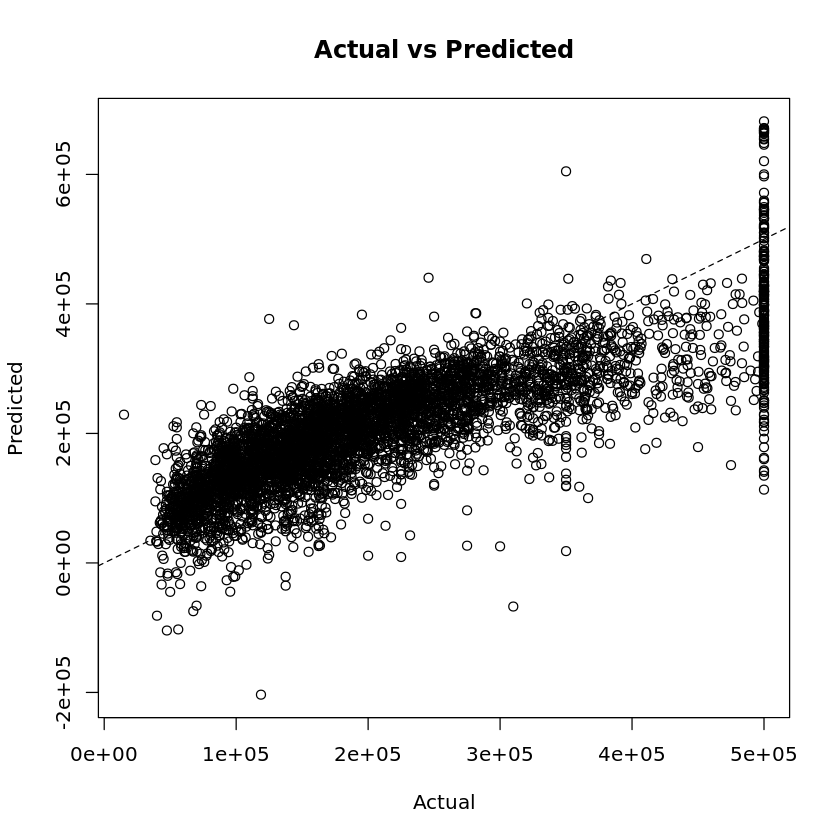

In [14]:
test$pred <- as.numeric(predict(fit, newdata = test))
ok <- !is.na(test$pred)
with(test[ok, ], {
  plot(median_house_value, pred,
       xlab = "Actual", ylab = "Predicted", main = "Actual vs Predicted")
  abline(0, 1, lty = 2)
})

#### e) Make a residuals plot.

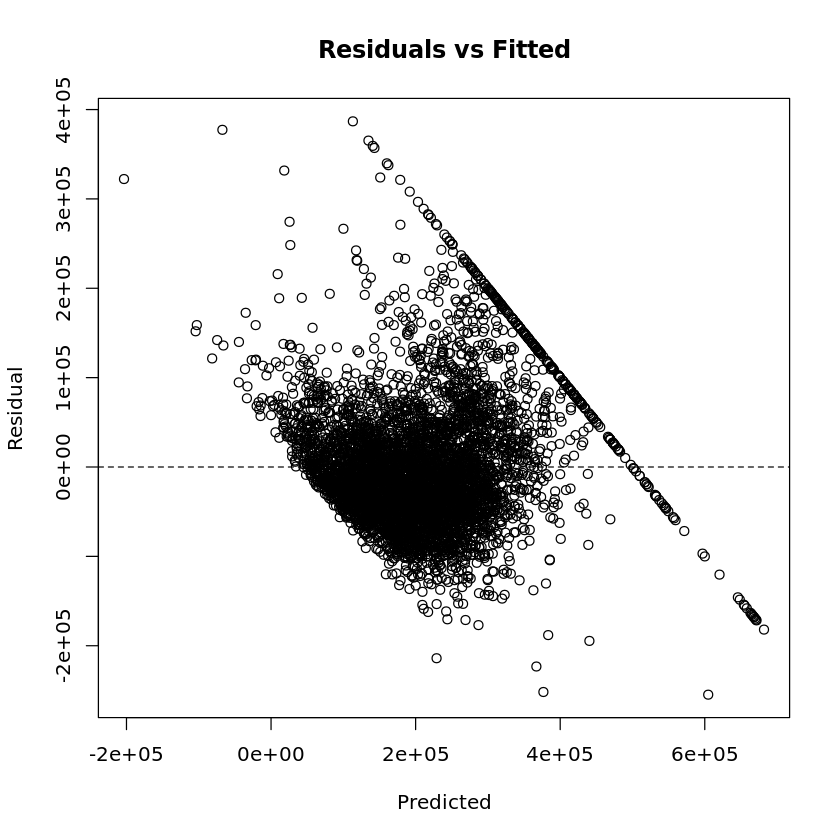

In [15]:
test$resid <- test$median_house_value - test$pred
with(test[ok, ], {
  plot(pred, resid,
       xlab = "Predicted", ylab = "Residual", main = "Residuals vs Fitted")
  abline(h = 0, lty = 2)
})

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

#### c) Fit the model.

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

#### f) Make a plot of actual vs. predicted values for the LASSO model.